In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns

In [2]:
df = pd.read_csv("bank-full.csv", sep=';')

In [3]:
df_encoded = df.copy()
label_encoders = {}

In [4]:
for column in df_encoded.columns:
    if df_encoded[column].dtype == 'object':
        le = LabelEncoder()
        df_encoded[column] = le.fit_transform(df_encoded[column])
        label_encoders[column] = le

In [5]:
X = df_encoded.drop("y", axis=1)
y = df_encoded["y"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [8]:
y_pred = clf.predict(X_test)

Accuracy: 0.8740462235983634

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      7952
           1       0.48      0.48      0.48      1091

    accuracy                           0.87      9043
   macro avg       0.70      0.70      0.70      9043
weighted avg       0.87      0.87      0.87      9043


Confusion Matrix:


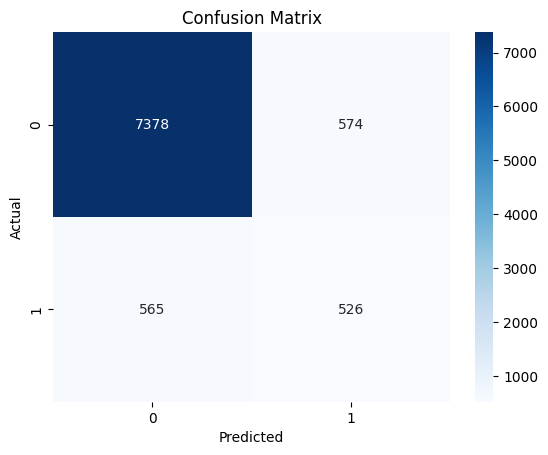

In [9]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

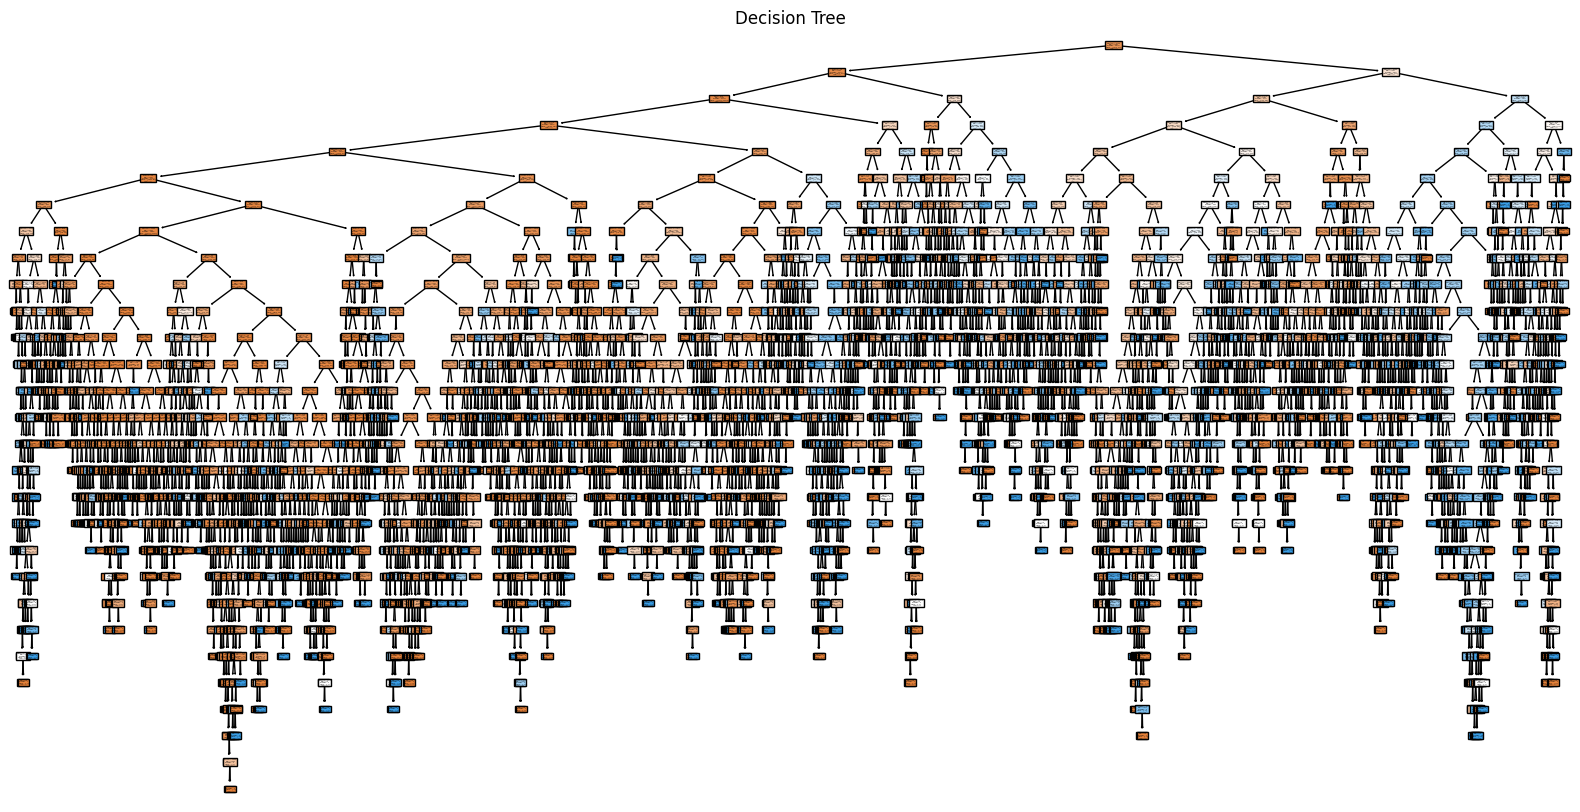

In [10]:
plt.figure(figsize=(20,10))
tree.plot_tree(clf, feature_names=X.columns, class_names=label_encoders['y'].classes_, filled=True)
plt.title("Decision Tree")
plt.show()

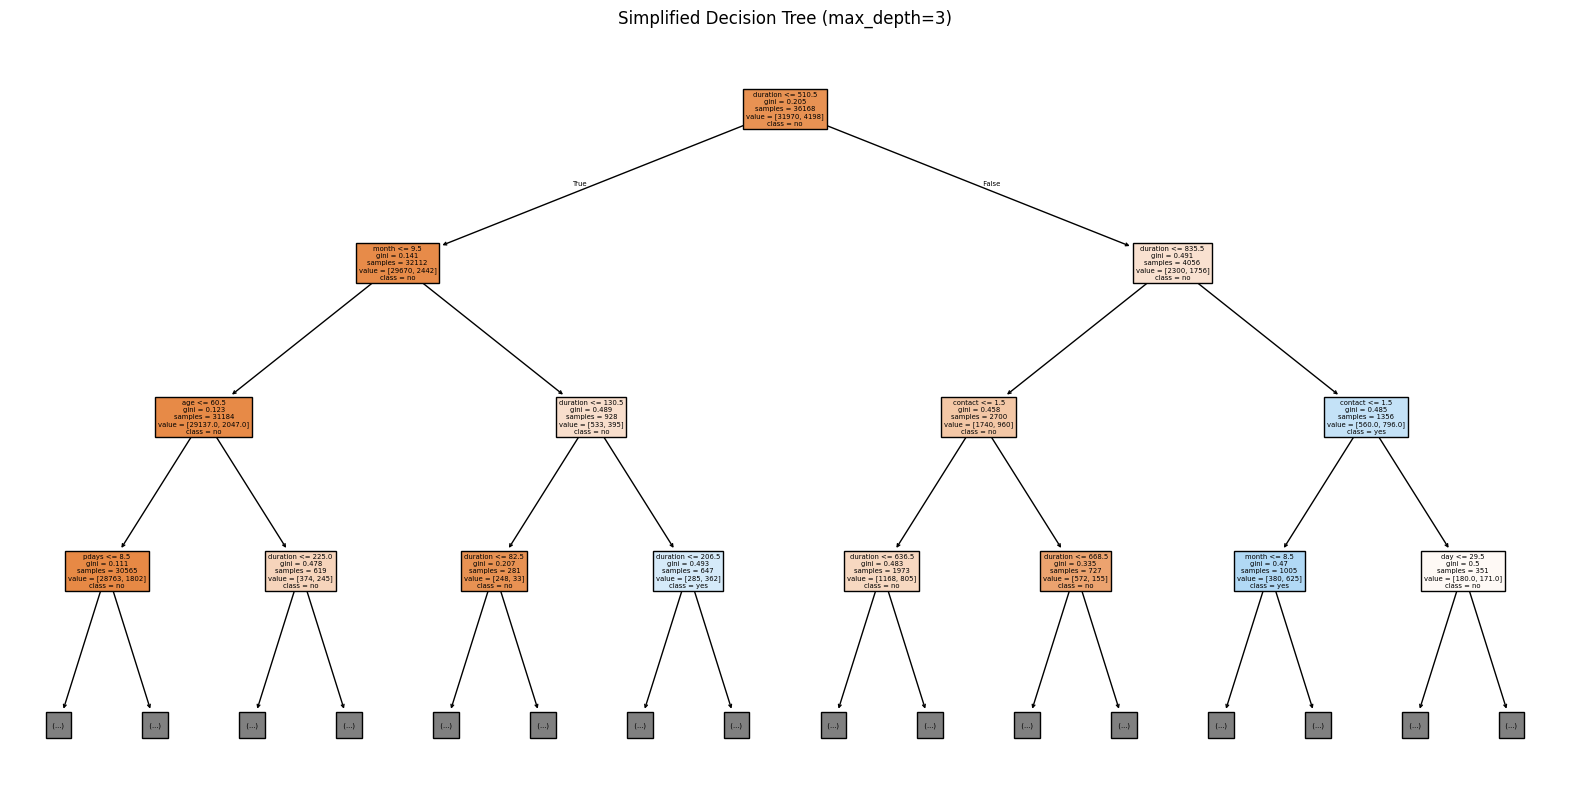

In [13]:
plt.figure(figsize=(20, 10))
tree.plot_tree(clf, 
               feature_names=X.columns, 
               class_names=label_encoders['y'].classes_, 
               filled=True, 
               max_depth=3)  # <-- limit depth here
plt.title("Simplified Decision Tree (max_depth=3)")
plt.show()

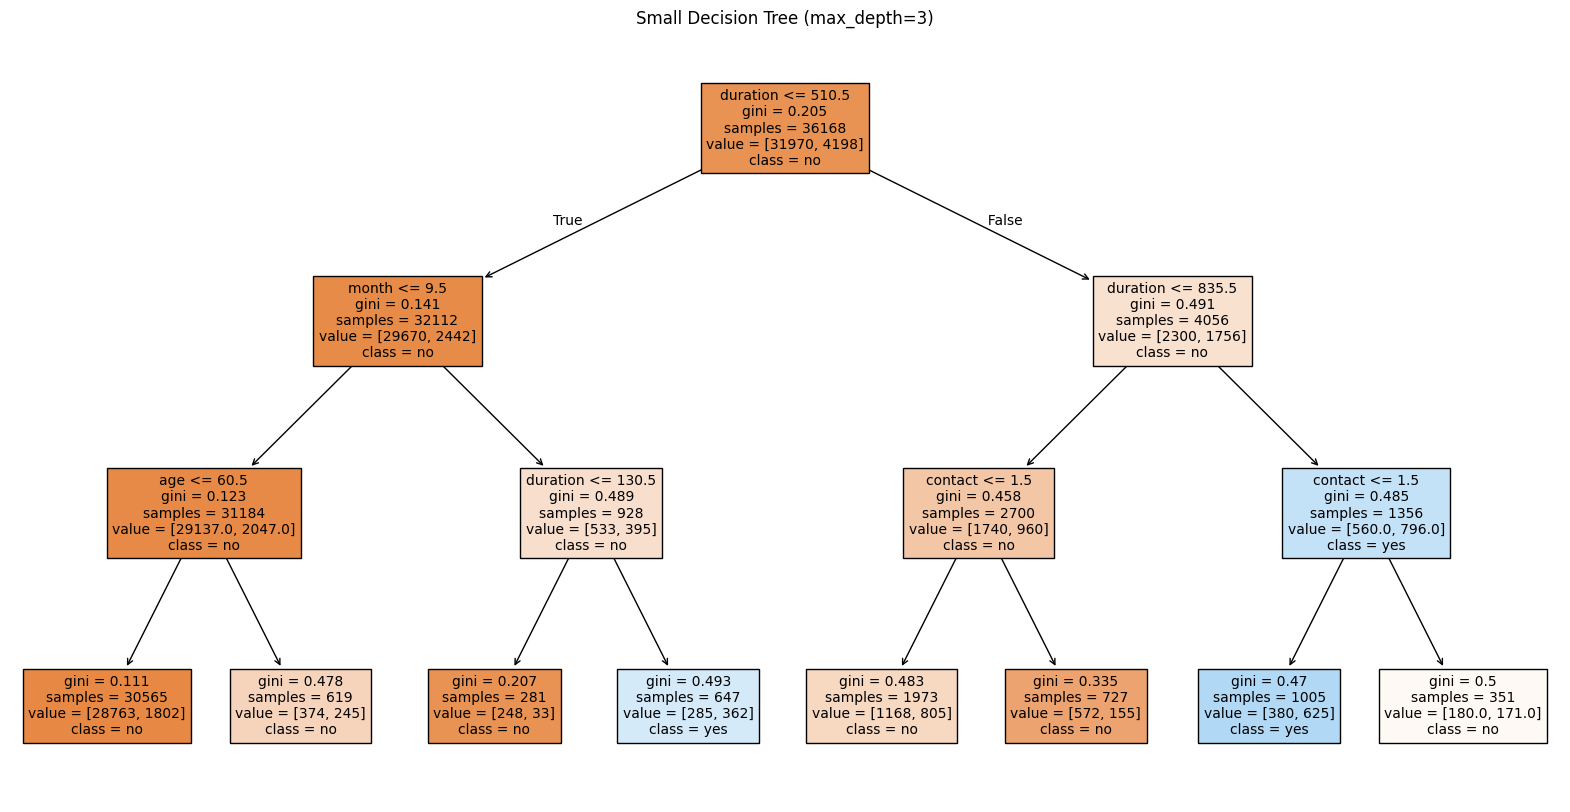

In [14]:
clf_small = DecisionTreeClassifier(max_depth=3, random_state=42)
clf_small.fit(X_train, y_train)

# Visualize it
plt.figure(figsize=(20, 10))
tree.plot_tree(clf_small, 
               feature_names=X.columns, 
               class_names=label_encoders['y'].classes_, 
               filled=True)
plt.title("Small Decision Tree (max_depth=3)")
plt.show()